# ___Singular Value Decomposition (SVD)___

_There are many algorithms that can be used for dimensionality reduction._

_Two main classes of methods are those drawn from linear algebra and those drawn from manifold learning._

## ___Linear Algebra Methods___
_Matrix factorization methods drawn from the field of linear algebra can be used for dimensionality._

* _Principal Components Analysis_
* _Singular Value Decomposition_
* _Non-Negative Matrix Factorization_

## ___Manifold Learning Methods___
_Manifold learning methods seek a lower-dimensional projection of high dimensional input that captures the salient properties of the input data._

* _Isomap Embedding_
* _Locally Linear Embedding_
* _Multidimensional Scaling_
* _Spectral Embedding_
* _t-distributed Stochastic Neighbor Embedding_

## ___Singular-Value Decomposition___
_The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. SVD can be applied to both real values and complex values._

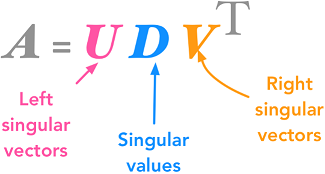

_Where A is the real m x n matrix that we wish to decompose, U is an m x m matrix, Sigma is an m x n diagonal matrix, and V^T is the  transpose of an n x n matrix where T is a superscript._

_The diagonal values in the Sigma matrix are known as the singular values of the original matrix A. The columns of the U matrix are called the left-singular vectors of A, and the columns of V are called the right-singular vectors of A._

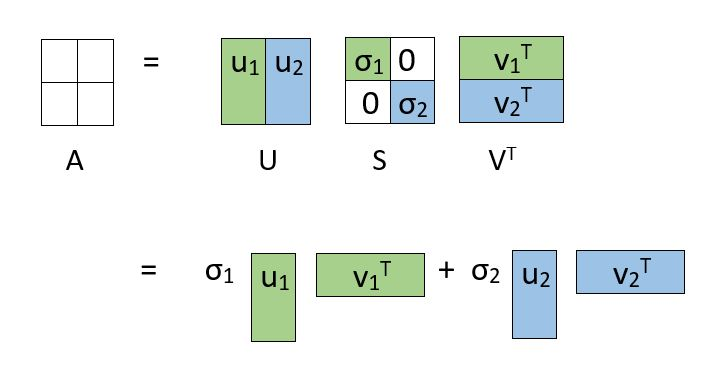

_[Reference 1](https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491)_ _[Important Reference 2](https://www.youtube.com/watch?v=4tvw-1HI45s)_ _[Reference 3](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/)_

_Singular Value Decomposition, or SVD, is one of the most popular techniques for dimensionality reduction for sparse data (data with many zero values)._

_Sparse data refers to rows of data where many of the values are zero. This is often the case in some problem domains like recommender systems where a user has a rating for very few movies or songs in the database and zero ratings for all other cases. Another common example is a bag of words model of a text document, where the document has a count or frequency for some words and most words have a 0 value._

_Examples of sparse data appropriate for applying SVD for dimensionality reduction:_

* _Recommender Systems_
* _Customer-Product purchases_
* _User-Song Listen Counts_
* _User-Movie Ratings_
* _Text Classification_
* _One Hot Encoding_
* _Bag of Words Counts_
* _TF/IDF_

## ___3 Ways to Perform SVD in Python___

### ___Numpy___

In [1]:
import numpy as np
from numpy.linalg import svd

# define your matrix as a 2D numpy array
A = np.array([[4, 0], [3, -5]])

U, S, VT = svd(A)

print("Left Singular Vectors:")
print(U)
print("Singular Values:") 
print(np.diag(S))
print("Right Singular Vectors:") 
print(VT)

Left Singular Vectors:
[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
Singular Values:
[[6.32455532 0.        ]
 [0.         3.16227766]]
Right Singular Vectors:
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


In [2]:
# check that this is an exact decomposition
# @ is used for matrix multiplication in Py3, use np.matmul with Py2
print(U @ np.diag(S) @ VT)

[[ 4.00000000e+00 -1.11022302e-15]
 [ 3.00000000e+00 -5.00000000e+00]]


### ___Truncated SVD in scikit-learn___

_In case of Dimensionality Reduction, it is better to use TruncatedSVD from sklearn.decomposition. You specify the number of features you want in the output as the n_components parameter. n_components should be strictly less than the number of features in the input matrix._

In [6]:
from sklearn.decomposition import TruncatedSVD

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
print("Original Matrix:")
print(A)

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(A)

Original Matrix:
[[-1  2  0]
 [ 2  0 -2]
 [ 0 -2  1]]


In [7]:
print("Singular values:")
print(svd.singular_values_)

Singular values:
[3. 3.]


In [8]:
print("Transformed Matrix after reducing to 2 features:")
print(A_transf)

Transformed Matrix after reducing to 2 features:
[[ 2.21359436  0.31622777]
 [-1.26491106  2.52982213]
 [-1.58113883 -1.58113883]]


In [12]:
print("Explained Variance Ratio after reducing to 2 features:")
print(svd.explained_variance_ratio_)

print('Total Variance Explained:')
print(round(svd.explained_variance_ratio_.sum()*100,2))

Explained Variance Ratio after reducing to 2 features:
[0.51153846 0.48846154]
Total Variance Explained:
100.0


### ___Randomized SVD in scikit-learn___
_Randomized SVD gives the same results as Truncated SVD and has a faster computation time. While Truncated SVD uses an exact solver ARPACK, Randomized SVD uses approximation techniques._

In [4]:
from sklearn.utils.extmath import randomized_svd

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
u, s, vt = randomized_svd(A, n_components = 2)

print("Left Singular Vectors:")
print(u)

print("Singular Values:") 
print(np.diag(s))

print("Right Singular Vectors:") 
print(vt)

Left Singular Vectors:
[[ 0.73786479  0.10540926]
 [-0.42163702  0.84327404]
 [-0.52704628 -0.52704628]]
Singular Values:
[[3. 0.]
 [0. 3.]]
Right Singular Vectors:
[[-0.52704628  0.84327404  0.10540926]
 [ 0.52704628  0.42163702 -0.73786479]]


## ___Dimensionality Reduction -Gapminder Data___

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data_url = "https://goo.gl/ioc2Td"
gapminder = pd.read_csv(data_url)
print(gapminder.head(3))

  continent  country  gdpPercap_1952  gdpPercap_1957  gdpPercap_1962  \
0    Africa  Algeria     2449.008185     3013.976023     2550.816880   
1    Africa   Angola     3520.610273     3827.940465     4269.276742   
2    Africa    Benin     1062.752200      959.601080      949.499064   

   gdpPercap_1967  gdpPercap_1972  gdpPercap_1977  gdpPercap_1982  \
0     3246.991771     4182.663766     4910.416756     5745.160213   
1     5522.776375     5473.288005     3008.647355     2756.953672   
2     1035.831411     1085.796879     1029.161251     1277.897616   

   gdpPercap_1987  ...    pop_1962    pop_1967    pop_1972    pop_1977  \
0     5681.358539  ...  11000948.0  12760499.0  14760787.0  17152804.0   
1     2430.208311  ...   4826015.0   5247469.0   5894858.0   6162675.0   
2     1225.856010  ...   2151895.0   2427334.0   2761407.0   3168267.0   

     pop_1982    pop_1987    pop_1992    pop_1997  pop_2002  pop_2007  
0  20033753.0  23254956.0  26298373.0  29072015.0  31287142  3333

In [15]:
lifeExp = gapminder.loc[:, gapminder.columns.str.contains('^life|^c')]
lifeExp.head()

,continent,country,lifeExp_1952,lifeExp_1957,lifeExp_1962,lifeExp_1967,lifeExp_1972,lifeExp_1977,lifeExp_1982,lifeExp_1987,lifeExp_1992,lifeExp_1997,lifeExp_2002,lifeExp_2007
0,Africa,Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
1,Africa,Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
2,Africa,Benin,38.223,40.358,42.618,44.885,47.014,49.190,50.904,52.337,53.919,54.777,54.406,56.728
3,Africa,Botswana,47.622,49.618,51.520,53.298,56.024,59.319,61.484,63.622,62.745,52.556,46.634,50.728
4,Africa,Burkina Faso,31.975,34.906,37.814,40.697,43.591,46.137,48.122,49.557,50.260,50.324,50.650,52.295


In [16]:
lifeExp_AE = lifeExp[lifeExp.continent.isin(['Africa','Europe'])]
lifeExp_AE.shape

(82, 14)

In [17]:
lifeExp_meta = lifeExp_AE.loc[:, lifeExp_AE.columns.str.contains('^c')]
lifeExp_meta.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso


In [18]:
lifeExp_AE = lifeExp_AE.drop(columns=['continent', 'country'])
lifeExp_AE.head(n=3)

,lifeExp_1952,lifeExp_1957,lifeExp_1962,lifeExp_1967,lifeExp_1972,lifeExp_1977,lifeExp_1982,lifeExp_1987,lifeExp_1992,lifeExp_1997,lifeExp_2002,lifeExp_2007
0,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
1,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
2,38.223,40.358,42.618,44.885,47.014,49.190,50.904,52.337,53.919,54.777,54.406,56.728


In [19]:
lifeExp_AE_scaled = (lifeExp_AE-lifeExp_AE.mean())/lifeExp_AE.std()
print(lifeExp_AE_scaled.head(n=3))

   lifeExp_1952  lifeExp_1957  lifeExp_1962  lifeExp_1967  lifeExp_1972  \
0     -0.394065     -0.362388     -0.318266     -0.220089     -0.116843   
1     -1.364384     -1.377154     -1.391081     -1.408750     -1.438966   
2     -0.754648     -0.757365     -0.744677     -0.722776     -0.714866   

   lifeExp_1977  lifeExp_1982  lifeExp_1987  lifeExp_1992  lifeExp_1997  \
0      0.020739      0.168041      0.426042      0.511124      0.581049   
1     -1.491952     -1.619589     -1.767824     -1.619366     -1.591543   
2     -0.699566     -0.704999     -0.714568     -0.575861     -0.526866   

   lifeExp_2002  lifeExp_2007  
0      0.662703      0.673421  
1     -1.517351     -1.505745  
2     -0.543083     -0.474234  


In [20]:
u, s, v = np.linalg.svd(lifeExp_AE_scaled, full_matrices=True)

print(u.shape)

print(s.shape)

print(v.shape)

(82, 82)
(12,)
(12, 12)


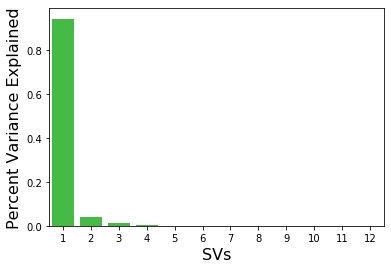

In [21]:
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
var_explained
 
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

In [22]:
labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=lifeExp_meta["continent"].tolist(), columns=labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Continent'}, inplace=True)
svd_df.head()

,Continent,SV1,SV2
0,Africa,0.014940,-0.212346
1,Africa,-0.172656,0.046238
2,Africa,-0.075906,-0.045773
3,Africa,-0.021360,0.189510
4,Africa,-0.111868,-0.052854


Text(0, 0.5, 'SV 2: 4.0%')

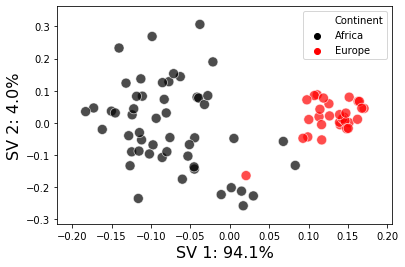

In [23]:
# specify colors for each continent
color_dict = dict({'Africa':'Black',
                   'Europe': 'Red'})
# Scatter plot: SV1 and SV2
sns.scatterplot(x="SV1", y="SV2", hue="Continent", 
                palette=color_dict, 
                data=svd_df, s=100,
                alpha=0.7)
plt.xlabel('SV 1: {0}%'.format(var_explained[0]*100), fontsize=16)
plt.ylabel('SV 2: {0}%'.format(var_explained[1]*100), fontsize=16)

## ___SVD for Image Compression___

(900, 900) (900,) (1600, 1600)


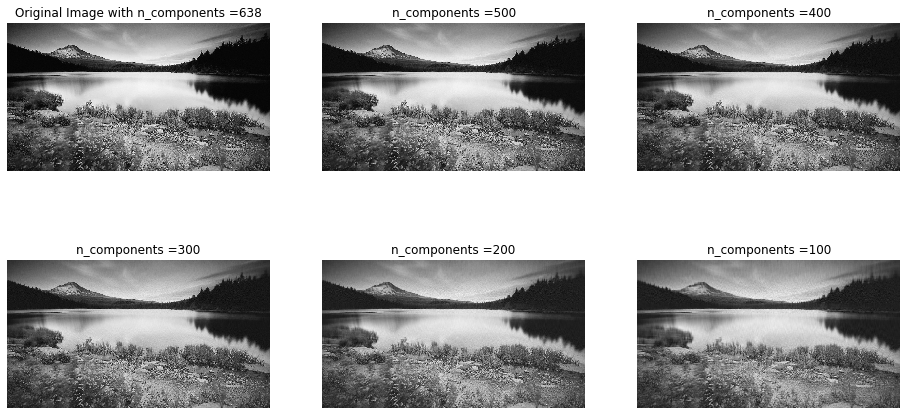

In [25]:
import cv2

# read image in grayscale
img = cv2.imread(r'C:\Users\PiyushSin\Desktop\datasets\svd_image.jpg', 0)

# obtain svd
U, S, V = np.linalg.svd(img)

# inspect shapes of the matrices
print(U.shape, S.shape, V.shape)

# plot images with different number of components
comps = [638, 500, 400, 300, 200, 100]

plt.figure(figsize = (16, 8))
for i in range(6):
    low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
    if(i  == 0):
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
    else:
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))